# 问答摘要与推理

## 问题描述
项目一是由百度AI技术生态部门提供，题目为“汽车大师问答摘要与推理”。

要求大家使用汽车大师提供的11万条（技师与用户的多轮对话与诊断建议报告数据）建立模型，模型需基于对话文本、用户问题、车型与车系，输出包含摘要与推断的报告文本，综合考验模型的归纳总结与推断能力。该解决方案可以节省大量人工时间，提高用户获取回答和解决方案的效率。

## 数据说明
对于每个用户问题"QID"，有对应文本形式的文本集合 D = "Brand", "Collection", "Problem", "Conversation"，要求阅读理解系统自动对D进行分析，输出相应的报告文本"Report"，其中包含摘要与推理。目标是"Report"可以正确、完整、简洁、清晰、连贯地对D中的信息作归纳总结与推理。

训练：所提供的训练集（82943条记录）建立模型，基于汽车品牌、车系、问题内容与问答对话的文本，输出建议报告文本

输出结果：对所提供的测试集（20000条记录）使用训练好的模型，输出建议报告的结果文件，通过最终测评得到评价分数

请提交一个CSV文件，包含QID和Prediction两个字段，分隔符为逗号(',')，请注意区分大小写。参考样例如下：

|QID|Prediction|
|-|-|
|Q103432|你的预测|
|Q100965|你的预测|

训练、测试数据


In [32]:
import pandas as pd

train_path = "/Users/zn-nlp/Documents/project1_auto_master_qa/datasets/AutoMaster_TrainSet.csv"
test_path = "/Users/zn-nlp/Documents/project1_auto_master_qa/datasets/AutoMaster_TestSet.csv"

In [33]:
df = pd.read_csv(train_path, encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zn-nlp/Documents/project1_auto_master_qa/datasets/AutoMaster_TrainSet.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82943 entries, 0 to 82942
Data columns (total 6 columns):
QID         82943 non-null object
Brand       81642 non-null object
Model       81642 non-null object
Question    82943 non-null object
Dialogue    82941 non-null object
Report      82873 non-null object
dtypes: object(6)
memory usage: 3.8+ MB


In [4]:
df.head()

,QID,Brand,Model,Question,Dialogue,Report
0,Q1,奔驰,奔驰GL级,方向机重，助力泵，方向机都换了还是一样,技师说：[语音]|车主说：新的都换了|车主说：助力泵，方向机|技师说：[语音]|车主说：换了...,随时联系
1,Q2,奔驰,奔驰M级,奔驰ML500排气凸轮轴调节错误,技师说：你这个有没有电脑检测故障代码。|车主说：有|技师说：发一下|车主说：发动机之前亮故障...,随时联系
2,Q3,宝马,宝马X1(进口),2010款宝马X1，2011年出厂，2.0排量，通用6L45变速箱，原地换挡位PRND车辆闯...,技师说：你好，4缸自然吸气发动机N46是吧，先挂空档再挂其他档有没有闯动呢，变速箱油液位是否...,行驶没有顿挫的感觉，原地换挡有闯动，刹车踩重没有，这是力的限制的作用，应该没有问题
3,Q4,Jeep,牧马人,3.0V6发动机号在什么位置，有照片最好！,技师说：右侧排气管上方，缸体上靠近变速箱|车主说：[图片]|车主说：是不是这个？|车主说：这...,举起车辆，在左前轮这边的缸体上
4,Q5,奔驰,奔驰C级,2012款奔驰c180怎么样，维修保养，动力，值得拥有吗,技师说：家庭用车的话，还是可以入手的|技师说：维修保养费用不高|车主说：12年的180市场价...,家庭用车可以入手的，维修保养价格还可以。车况好，价格合理可以入手


In [5]:
df.iloc[0]

QID                                                        Q1
Brand                                                      奔驰
Model                                                   奔驰GL级
Question                                  方向机重，助力泵，方向机都换了还是一样
Dialogue    技师说：[语音]|车主说：新的都换了|车主说：助力泵，方向机|技师说：[语音]|车主说：换了...
Report                                                   随时联系
Name: 0, dtype: object

# 如何完成项目

## Tensorflow and PyTorch

## Github

## 每周提交作业

## 多在群里讨论

# 分词

## jieba

+ jieba.cut 方法接受三个输入参数: 需要分词的字符串；cut_all 参数用来控制是否采用全模式；HMM 参数用来控制是否使用 HMM 模型
+ jieba.cut_for_search 方法接受两个参数：需要分词的字符串；是否使用 HMM 模型。该方法适合用于搜索引擎构建倒排索引的分词，粒度比较细待分词的字符串可以是 unicode 或 UTF-8 字符串、GBK 字符串。注意：不建议直接输入 GBK 字符串，可能无法预料地错误解码成 UTF-8
+ jieba.cut 以及 jieba.cut_for_search 返回的结构都是一个可迭代的 generator，可以使用 for 循环来获得分词后得到的每一个词语(unicode)，或者用
+ jieba.lcut 以及 jieba.lcut_for_search 直接返回 list
+ jieba.Tokenizer(dictionary=DEFAULT_DICT) 新建自定义分词器，可用于同时使用不同词典。jieba.dt 为默认分词器，所有全局分词相关函数都是该分词器的映射。


In [6]:
import jieba
import jieba.posseg as pseg

In [7]:
seg_list = jieba.cut('我来到北京清华大学',cut_all=True)
print('Full Mode:' + '/'.join(seg_list)) #全模式

seg_list = jieba.cut('我来到北京清华大学',cut_all=False)
print('Default Mode:' + '/'.join(seg_list)) # 精确模式

seg_list = jieba.cut('我来到北京清华大学')
print(', '.join(seg_list)) # 默认为精确模式

seg_list = jieba.cut_for_search('小明硕士毕业于中国科学院计算所，后在日本京都大学深造') # 搜索引擎模式
print('Search Engin Mode'+', '.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/sj/8mpjzv0n0y9ddyrkwd7zj8540000gn/T/jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built succesfully.


Full Mode:我/来到/北京/清华/清华大学/华大/大学
Default Mode:我/来到/北京/清华大学
我, 来到, 北京, 清华大学
Search Engin Mode小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [8]:
words = pseg.cut('我爱北京天安门')
for w, f in enumerate(words):
    print(("word: %s\tflag: %s")%(w,f))

word: 0	flag: 我/r
word: 1	flag: 爱/v
word: 2	flag: 北京/ns
word: 3	flag: 天安门/ns


# Gensim 词向量

In [1]:
from gensim.models import KeyedVectors
import time

/Users/zhangchunyang/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
%%time
wv_model = KeyedVectors.load('wv/word2vec.model')

CPU times: user 967 ms, sys: 162 ms, total: 1.13 s
Wall time: 1.16 s


In [4]:
wv_model.wv['维修']

array([ 1.58235982e-01, -2.61883706e-01,  1.62336126e-01,  8.85544643e-02,
       -1.46510117e-02, -2.09542871e-01,  8.12062249e-02, -1.43722415e-01,
        1.03082664e-01,  1.12199403e-01, -3.30058068e-01, -1.46056905e-01,
        1.62128136e-01, -3.00620764e-01,  3.07419926e-01, -4.66545671e-02,
       -1.09406173e-01,  6.34395182e-02,  1.93055212e-01, -2.78982610e-01,
       -1.81792080e-02,  2.25594327e-01,  5.68810143e-02,  2.92701572e-02,
       -3.20064336e-01,  1.31448328e-01,  2.84659211e-03,  1.93726972e-01,
       -2.84232587e-01,  1.13915568e-02,  3.32291991e-01, -1.14366725e-01,
        1.05838537e-01,  1.46952987e-01, -4.01179232e-02,  2.29132712e-01,
        2.55235732e-02,  6.15437515e-02,  1.78509429e-01, -2.40973279e-01,
        2.42203578e-01,  8.20337832e-02,  2.01181427e-01, -4.97813933e-02,
       -3.43562394e-01, -8.47347379e-02,  1.08576424e-01,  1.00295737e-01,
        4.99092013e-01, -2.73089111e-02,  1.24530628e-01,  2.32436992e-02,
        2.11259321e-04, -

In [19]:
%%time
print(wv_model.wv.most_similar("维修"))
run()

[('修理', 0.6276759505271912), ('三四千元', 0.5785166025161743), ('相关检查', 0.5732730031013489), ('俢', 0.5723018646240234), ('维修厂', 0.5711143612861633), ('陪同', 0.5633670091629028), ('预估', 0.5625522136688232), ('店多', 0.5623753666877747), ('复检', 0.5620087385177612), ('SSSS', 0.5597015023231506)]
CPU times: user 32.8 ms, sys: 14.4 ms, total: 47.2 ms
Wall time: 34.4 ms


使用gensim有以下缺点：

* gensim加载模型耗时很长

* 占用内存很大，会将所有的词向量加载进入内存，占用内存很大（>10g）

* most_similar函数耗时较长。gensim使用的算法似乎是暴力求解（待验证），耗时较长，0.17秒。

# Annoy 加速词向量搜索

当词向量非常大的时候，如何提升搜索查找速度

In [34]:
!pip install annoy

     |████████████████████████████████| 646 kB 307 kB/s eta 0:00:01
  Created wheel for annoy: filename=annoy-1.17.0-cp38-cp38-macosx_10_12_x86_64.whl size=75299 sha256=7e3184416357bd38357618b238a73f8cbb894987a546cec09db71416737d6f26
  Stored in directory: /Users/zhangchunyang/Library/Caches/pip/wheels/77/01/de/4421524f9997a25dfa7291121565d12ef514154945e80e907a
Successfully built annoy


In [40]:
from gensim.similarities.annoy import AnnoyIndexer

# 100 trees are being used in this example
annoy_index = AnnoyIndexer(wv_model, 100)

In [42]:
%%time
# Derive the vector for the word "science" in our model
vector = wv_model.wv["维修"]
# The instance of AnnoyIndexer we just created is passed
approximate_neighbors = wv_model.wv.most_similar([vector], topn=11, indexer=annoy_index)
# Neatly print the approximate_neighbors and their corresponding cosine similarity values
print("Approximate Neighbors")
for neighbor in approximate_neighbors:
    print(neighbor)

Approximate Neighbors
('维修', 0.9998273665114539)
('修理', 0.5685350894927979)
('相关检查', 0.5380871295928955)
('俢', 0.5375618934631348)
('维修厂', 0.5369202792644501)
('陪同', 0.5327564477920532)
('预估', 0.5323207378387451)
('店多', 0.5322262346744537)
('复检', 0.532030314207077)
('SSSS', 0.5307993590831757)
('汽车电器', 0.5293990969657898)
CPU times: user 1.9 ms, sys: 1.14 ms, total: 3.04 ms
Wall time: 1.81 ms


In [43]:
%%time
normal_neighbors = wv_model.wv.most_similar([vector], topn=11)
print("\nExact Neighbors")
for neighbor in normal_neighbors:
    print(neighbor)


Exact Neighbors
('维修', 1.0000001192092896)
('修理', 0.6276759505271912)
('三四千元', 0.5785166025161743)
('相关检查', 0.5732730031013489)
('俢', 0.5723018646240234)
('维修厂', 0.5711143612861633)
('陪同', 0.5633670091629028)
('预估', 0.5625522136688232)
('店多', 0.5623753666877747)
('复检', 0.5620087385177612)
('SSSS', 0.5597015023231506)
CPU times: user 6.37 ms, sys: 2.17 ms, total: 8.53 ms
Wall time: 3.15 ms


## 腾讯词大规模中文词向量


https://ai.tencent.com/ailab/nlp/en/embedding.html

In [1]:
from gensim.models.word2vec import KeyedVectors

/Users/zhangchunyang/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
tc_wv = KeyedVectors.load_word2vec_format('Tencent_AILab_ChineseEmbedding/Tencent_AILab_ChineseEmbedding.txt', binary=False, limit=100000)

加载缓慢的问题 https://stackoverflow.com/questions/42986405/how-to-speed-up-gensim-word2vec-model-load-time

In [8]:
tc_wv['你好']

NameError: name 'tc_wv' is not defined

In [4]:
tc_wv.save('Tencent_AILab_ChineseEmbedding/Tencent_AILab_ChineseEmbedding.wordvectors')

In [11]:
%%time
from gensim.models import KeyedVectors
from threading import Semaphore


tc_wv = KeyedVectors.load('Tencent_AILab_ChineseEmbedding/Tencent_AILab_ChineseEmbedding.wordvectors', mmap='r')
# model.syn0norm = model.syn0  # prevent recalc of normed vectors
tc_wv.most_similar('stuff')  # any word will do: just to page all in
# Semaphore(0).acquire()  # just hang until process killed

CPU times: user 1.12 s, sys: 614 ms, total: 1.73 s
Wall time: 1.65 s


[('headlines', 0.7523146867752075),
 ('best', 0.7397920489311218),
 ('phones', 0.7249292731285095),
 ('times', 0.7244877815246582),
 ('find', 0.7193858027458191),
 ('simply', 0.7189313173294067),
 ('looks', 0.7098098397254944),
 ('places', 0.7097486853599548),
 ('smartphone', 0.7090697288513184),
 ('thing', 0.7079541683197021)]

# 企业里怎么处理大规模向量 - Faiss 加速

官方文档：https://github.com/facebookresearch/faiss

## 构建索引

In [10]:
import faiss        

# make faiss available
index = faiss.IndexFlatL2(200)   # build the index
print(index.is_trained)
# add vectors to the index
index.add(tc_wv.vectors)                  
print(index.ntotal)

True
100000


In [21]:
k = 4                          # we want to see 4 nearest neighbors
D, I = index.search(tc_wv.vectors[:4], k) # sanity check
print(I)
print(D)

[[   0    1    2 3040]
 [   1    2 3040   12]
 [   2    1   17    4]
 [   3    2   13    1]]
[[0.        4.786625  4.8761697 5.2939434]
 [0.        0.6934884 1.1962498 1.3620954]
 [0.        0.6934884 1.6533197 1.9003876]
 [0.        2.0715084 2.7620077 3.3057845]]


## whatlies

pip install whatlies

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from whatlies import Embedding, EmbeddingSet
import matplotlib.pylab as plt

In [29]:
man   = Embedding("man", wv_model.wv['男人'])
woman = Embedding("woman", wv_model.wv['女人'])
car  = Embedding("car", wv_model.wv['机车'])
auto = Embedding("auto", wv_model.wv['汽车'])
cat = Embedding("cat", wv_model.wv['猫'])
tiger = Embedding("tiger", wv_model.wv['老虎'])

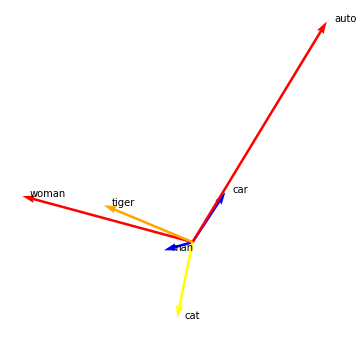

In [31]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
car.plot(kind="arrow", color="blue")
auto.plot(kind="arrow", color="red")
cat.plot(kind="arrow", color="yellow")
tiger.plot(kind="arrow", color="orange")

(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)

plt.axis('off');